# [Recomendation Movie Based on MovieTweetings Ratings]

In [1]:
import pandas as pd
import sys
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
np.set_printoptions(threshold=sys.maxsize)

In [2]:
# https://www.kaggle.com/tunguz/movietweetings#ratings.dat


m_cols = ['movie_id', 'movie_title', 'genre']
movies = pd.read_csv('/Users/dimas/Documents/DataScience/JC_DATA_SCIENCE/kelasModul/projectAkhir/RecomederSystem/movietweetings/movies.dat', sep='::', names=m_cols, usecols=range(3), encoding="ISO-8859-1")

r_cols = ['user_id', 'movie_id', 'rating','rating_timestamp']
ratings = pd.read_csv('/Users/dimas/Documents/DataScience/JC_DATA_SCIENCE/kelasModul/projectAkhir/RecomederSystem/movietweetings/ratings.dat', sep='::', names=r_cols, usecols=range(3), encoding="ISO-8859-1")


df = pd.merge(movies, ratings)

df.head()

/Users/dimas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
/Users/dimas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,movie_id,movie_title,genre,user_id,rating
0,8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short,45154,5
1,10,La sortie des usines LumiÃ¨re (1895),Documentary|Short,54337,10
2,12,The Arrival of a Train (1896),Documentary|Short,43407,10
3,25,The Oxford and Cambridge University Boat Race ...,NaN,34505,8
4,91,Le manoir du diable (1896),Short|Horror,10455,7


In [3]:
dfMovie = pd.DataFrame()
dfMovie['movie_title'] = df['movie_title'].value_counts().index
dfMovie['amount_views'] = df['movie_title'].value_counts().values
dfMovie = dfMovie[dfMovie['amount_views'] >= dfMovie['amount_views'].iloc[0:100].min()]

In [4]:
dfMovie.head() # -> a hunderd populer movie the most 

# print(len(dfMovie))

,movie_title,amount_views
0,Gravity (2013),3066
1,Interstellar (2014),2738
2,The Wolf of Wall Street (2013),2733
3,Man of Steel (2013),2663
4,World War Z (2013),2402


In [5]:
dfM = pd.merge(dfMovie, movies)
df1 = pd.merge(dfM, ratings)
df1.head()

,movie_title,amount_views,movie_id,genre,user_id,rating
0,Gravity (2013),3066,1454468,Drama|Sci-Fi|Thriller,2,8
1,Gravity (2013),3066,1454468,Drama|Sci-Fi|Thriller,31,10
2,Gravity (2013),3066,1454468,Drama|Sci-Fi|Thriller,69,6
3,Gravity (2013),3066,1454468,Drama|Sci-Fi|Thriller,102,10
4,Gravity (2013),3066,1454468,Drama|Sci-Fi|Thriller,107,7


In [6]:
len(df1['user_id'].unique())

31659

In [54]:
userRatings = df1.pivot_table(index=['user_id'],columns=['movie_title'], values='rating')
userRatings.head()


movie_title,12 Years a Slave (2013),American Hustle (2013),American Sniper (2014),Ant-Man (2015),Argo (2012),Arrival (2016),Avengers: Age of Ultron (2015),Avengers: Endgame (2019),Avengers: Infinity War (2018),Baby Driver (2017),Batman v Superman: Dawn of Justice (2016),Birdman (2014),Black Panther (2018),Boyhood (2014),Bridge of Spies (2015),Captain America: Civil War (2016),Captain America: The Winter Soldier (2014),Captain Phillips (2013),Dallas Buyers Club (2013),Dawn of the Planet of the Apes (2014),Deadpool (2016),Despicable Me 2 (2013),Django Unchained (2012),Doctor Strange (2016),Dunkirk (2017),Edge of Tomorrow (2014),Elysium (2013),Ex Machina (2015),Fast & Furious 6 (2013),Frozen (2013),Furious 7 (2015),Fury (2014),Get Out (2017),Godzilla (2014),Gone Girl (2014),Gravity (2013),Guardians of the Galaxy (2014),Hacksaw Ridge (2016),Her (2013),Inside Out (2015),Interstellar (2014),Iron Man 3 (2013),It (2017),John Wick (2014),Joker (2019),Jurassic World (2015),Kingsman: The Secret Service (2014),La La Land (2016),Logan (2017),Lone Survivor (2013),Lucy (2014),Mad Max: Fury Road (2015),Man of Steel (2013),Manchester by the Sea (2016),Nightcrawler (2014),Non-Stop (2014),Now You See Me (2013),Oblivion (2013),Olympus Has Fallen (2013),Once Upon a Time... in Hollywood (2019),Pacific Rim (2013),Prisoners (2013),Room (2015),Rush (2013),Silver Linings Playbook (2012),Spectre (2015),Spider-Man: Homecoming (2017),Split (2016),Spotlight (2015),Star Trek Into Darkness (2013),Star Wars: The Force Awakens (2015),Suicide Squad (2016),Sully (2016),The Amazing Spider-Man 2 (2014),The Conjuring (2013),The Equalizer (2014),The Fault in Our Stars (2014),The Grand Budapest Hotel (2014),The Great Gatsby (2013),The Hangover Part III (2013),The Hateful Eight (2015),The Hobbit: The Desolation of Smaug (2013),The Hunger Games: Catching Fire (2013),The Imitation Game (2014),The Martian (2015),The Place Beyond the Pines (2012),The Revenant (2015),The Secret Life of Walter Mitty (2013),The Theory of Everything (2014),The Wolf of Wall Street (2013),The Wolverine (2013),This Is the End (2013),Thor: The Dark World (2013),"Three Billboards Outside Ebbing, Missouri (2017)",Toy Story 4 (2019),We're the Millers (2013),Whiplash (2014),Wonder Woman (2017),World War Z (2013),X-Men: Days of Future Past (2014)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
userRatings.shape

(31659, 100)

In [9]:
corrMatrix = userRatings.corr()
corrMatrix.head()

movie_title,12 Years a Slave (2013),American Hustle (2013),American Sniper (2014),Ant-Man (2015),Argo (2012),Arrival (2016),Avengers: Age of Ultron (2015),Avengers: Endgame (2019),Avengers: Infinity War (2018),Baby Driver (2017),Batman v Superman: Dawn of Justice (2016),Birdman (2014),Black Panther (2018),Boyhood (2014),Bridge of Spies (2015),Captain America: Civil War (2016),Captain America: The Winter Soldier (2014),Captain Phillips (2013),Dallas Buyers Club (2013),Dawn of the Planet of the Apes (2014),Deadpool (2016),Despicable Me 2 (2013),Django Unchained (2012),Doctor Strange (2016),Dunkirk (2017),Edge of Tomorrow (2014),Elysium (2013),Ex Machina (2015),Fast & Furious 6 (2013),Frozen (2013),Furious 7 (2015),Fury (2014),Get Out (2017),Godzilla (2014),Gone Girl (2014),Gravity (2013),Guardians of the Galaxy (2014),Hacksaw Ridge (2016),Her (2013),Inside Out (2015),Interstellar (2014),Iron Man 3 (2013),It (2017),John Wick (2014),Joker (2019),Jurassic World (2015),Kingsman: The Secret Service (2014),La La Land (2016),Logan (2017),Lone Survivor (2013),Lucy (2014),Mad Max: Fury Road (2015),Man of Steel (2013),Manchester by the Sea (2016),Nightcrawler (2014),Non-Stop (2014),Now You See Me (2013),Oblivion (2013),Olympus Has Fallen (2013),Once Upon a Time... in Hollywood (2019),Pacific Rim (2013),Prisoners (2013),Room (2015),Rush (2013),Silver Linings Playbook (2012),Spectre (2015),Spider-Man: Homecoming (2017),Split (2016),Spotlight (2015),Star Trek Into Darkness (2013),Star Wars: The Force Awakens (2015),Suicide Squad (2016),Sully (2016),The Amazing Spider-Man 2 (2014),The Conjuring (2013),The Equalizer (2014),The Fault in Our Stars (2014),The Grand Budapest Hotel (2014),The Great Gatsby (2013),The Hangover Part III (2013),The Hateful Eight (2015),The Hobbit: The Desolation of Smaug (2013),The Hunger Games: Catching Fire (2013),The Imitation Game (2014),The Martian (2015),The Place Beyond the Pines (2012),The Revenant (2015),The Secret Life of Walter Mitty (2013),The Theory of Everything (2014),The Wolf of Wall Street (2013),The Wolverine (2013),This Is the End (2013),Thor: The Dark World (2013),"Three Billboards Outside Ebbing, Missouri (2017)",Toy Story 4 (2019),We're the Millers (2013),Whiplash (2014),Wonder Woman (2017),World War Z (2013),X-Men: Days of Future Past (2014)
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12 Years a Slave (2013),1.000000,0.216893,0.173667,0.202587,0.299341,0.223694,0.239094,0.206936,0.080077,0.261986,0.129188,0.228799,0.148508,0.399234,0.445036,0.161408,0.299265,0.338576,0.322894,0.236339,0.167332,0.148881,0.216592,0.063693,0.259594,0.235486,0.232039,0.255249,0.121172,0.215201,0.155108,0.285523,0.268970,0.150628,0.300038,0.278274,0.292449,0.166220,0.295529,0.368077,0.140260,0.100207,0.176914,0.223094,0.174261,0.166502,0.147087,0.258215,0.182042,0.257259,0.080966,0.240496,0.137402,0.374424,0.381048,0.152674,0.147696,0.070618,0.102110,0.001003,0.146013,0.296306,0.258304,0.253810,0.215305,0.313692,0.093040,0.078961,0.325880,0.257881,0.175534,-0.015630,0.220708,0.207302,0.327559,0.160602,0.260358,0.275946,0.166433,0.208278,0.287695,0.257296,0.129922,0.418380,0.215554,0.284162,0.308480,0.243659,0.364434,0.271807,0.186484,0.167283,0.117702,0.038114,0.069506,0.276549,0.362896,0.167925,0.204777,0.277513
American Hustle (2013),0.216893,1.000000,0.172887,0.237176,0.286777,0.142149,0.241771,0.188773,0.108790,0.307207,0.180081,0.300883,-0.006565,0.242976,0.368138,0.166782,0.190593,0.199093,0.317783,0.125111,0.277475,0.088955,0.213300,0.337371,0.184088,0.271545,0.195532,0.235059,0.226977,0.237367,0.202990,0.230632,0.208122,0.248469,0.280066,0.222476,0.225394,0.090620,0.294928,0.309481,0.171587,0.154957,0.008882,0.254982,0.089909,0.029649,0.104897,0.186724,0.214430,0.192878,0.049111,0.219262,0.252483,0.229068,0.279870,0.017035,0.050623,0.148424,-0.078757,0.255728,0.312121,0.204164,0.218912,0.208990,0.455490,0.200280,0.265189,0.193068,0.185665,0.34

In [48]:
myRatings = userRatings.iloc[9].dropna()
myRatings


movie_title
Hacksaw Ridge (2016)                                10.0
Logan (2017)                                         9.0
Split (2016)                                         7.0
The Theory of Everything (2014)                      8.0
Three Billboards Outside Ebbing, Missouri (2017)     8.0
Name: 32, dtype: float64

In [49]:
len(corrMatrix['12 Years a Slave (2013)'])

100

In [50]:
simCandidates = pd.Series()
for i in range(0, len(myRatings.index)):
    print ("Adding sims for " + myRatings.index[i] + "...")
    # Retrieve similar movies to this one that I rated
    sims = corrMatrix[myRatings.index[i]].dropna()
    # Now scale its similarity by how well I rated this movie
    sims = sims.map(lambda x: x * myRatings[i])
    # Add the score to the list of similarity candidates
    simCandidates = simCandidates.append(sims)
    
#Glance at our results so far:
print ("sorting...")
simCandidates.sort_values(inplace = True, ascending = False)
print (simCandidates.head(10))

Adding sims for Hacksaw Ridge (2016)...
Adding sims for Logan (2017)...
Adding sims for Split (2016)...
Adding sims for The Theory of Everything (2014)...
Adding sims for Three Billboards Outside Ebbing, Missouri (2017)...
sorting...
Hacksaw Ridge (2016)                                10.000000
Logan (2017)                                         9.000000
Three Billboards Outside Ebbing, Missouri (2017)     8.000000
The Theory of Everything (2014)                      8.000000
Split (2016)                                         7.000000
Jurassic World (2015)                                5.898275
The Martian (2015)                                   4.544757
Lone Survivor (2013)                                 4.516129
Star Trek Into Darkness (2013)                       4.172841
Oblivion (2013)                                      4.076118
dtype: float64


In [51]:
simCandidates = simCandidates.groupby(simCandidates.index).sum()
simCandidates.sort_values(inplace = True, ascending = False)
simCandidates.head(10)

Logan (2017)                                        17.877766
Hacksaw Ridge (2016)                                15.507508
Rush (2013)                                         15.205513
Split (2016)                                        14.964899
The Theory of Everything (2014)                     14.848867
Jurassic World (2015)                               14.296750
Three Billboards Outside Ebbing, Missouri (2017)    13.468811
Star Trek Into Darkness (2013)                      13.235707
Captain America: Civil War (2016)                   13.085572
The Hunger Games: Catching Fire (2013)              12.860183
dtype: float64

In [52]:
filteredSims = simCandidates.drop(myRatings.index)
filteredSims.head(10)

Rush (2013)                               15.205513
Jurassic World (2015)                     14.296750
Star Trek Into Darkness (2013)            13.235707
Captain America: Civil War (2016)         13.085572
The Hunger Games: Catching Fire (2013)    12.860183
X-Men: Days of Future Past (2014)         12.751683
Frozen (2013)                             12.692645
Spotlight (2015)                          12.685317
The Martian (2015)                        12.415951
Bridge of Spies (2015)                    12.250592
dtype: float64

In [16]:
# dfr = pd.merge(movies,  pd.Series(myRatings.index))
# dfr

1. dfCorr = untuk lihat korelasi antar movie
2. lihat movie apa yg pernah di tonton + rating oleh si 0 (ada 3 movie)
3. nilai dfCorr tadi dikalikan dengan nilai raitng setipa movienya
4. lalu terdapat series yg len nya 3
5. setelah itu seriesnya di values=_counts biar ga duplikat karena kemungkiann ada 3 duplikat karena ada 3 film yg ditoton jadi film2 yg ditoton tersebut masing2 di cari koelasinya dengan film lain

In [99]:
a= [[1,2,3],[4,6,6],[6,6,8]]
dft = pd.DataFrame(a, columns=['q','p','e'], index=[1,2,3])
dft

,q,p,e
1,1,2,3
2,4,6,6
3,6,6,8


In [100]:
dft.corr()

,q,p,e
q,1.000000,0.917663,1.000000
p,0.917663,1.000000,0.917663
e,1.000000,0.917663,1.000000


In [101]:
import seaborn as sns

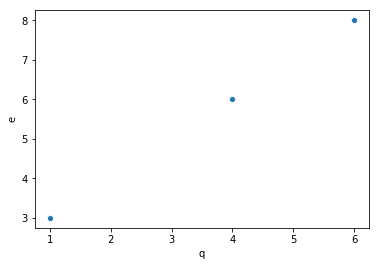

In [102]:
sns.scatterplot(x="q", y="e", data=dft)